# 発音記号の行列をNMF

## data

In [545]:
from sklearn.decomposition import NMF
from sklearn.decomposition import SparseCoder
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

In [612]:
ipa_e = ['iː', 'ɑː', 'ɔː', 'uː', 'ɜ:', 'eɪ', 'aɪ', 'ɔi', 'aʊ', 'əʊ', 'ɪə', 'eə', 'ʊə', 'tʃ', 'dʒ', 'ə', 'ɪ', 'e', 'æ', 'ɒ', 'ʌ', 'ʊ', 'p', 'b', 't', 'd', 'k', 'g', 'f', 'v', 'θ', 'ð', 's', 'z', 'ʃ', 'ʒ', 'h', 'm', 'n', 'ŋ', 'l', 'r', 'j', 'w']

In [610]:
ipa_j = ['a', 'i', 'ɯ', 'e', 'o', 'k', 'g', 'ŋ', 's', 'ʃ', 'ʒ', 'z', 't', 'd', 'n', 'ɲ', 'h', 'ç', 'ɸ', 'b', 'p', 'm', 'j', 'r', 'w', 'ɴ', 'ː']

In [98]:
data3 = pd.read_csv('data_preprocessed_by_hand_add_ipa_dropped.csv')

In [695]:
data = pd.read_csv('ipa_matrix.csv')

In [696]:
ipa = data['Unnamed: 0']
data = data.drop(['Unnamed: 0'], axis=1)

In [70]:
data.shape

(71, 776)

## NMF

In [536]:
def non_zeros_in_atom(P):
    tmp = []
    for i in range(P.shape[1]):
        tmp.append(len(np.argwhere(P[:,i])))
    return np.array(tmp)

In [538]:
error = []
non_zeros = []
for k in range(71):
    model = NMF(n_components=(k+1), init='random', random_state=0)
    P = model.fit_transform(data)
    Q = model.components_
    error.append(LA.norm(data - np.dot(P,Q), 'fro'))
    non_zeros.append(non_zeros_in_atom(P))

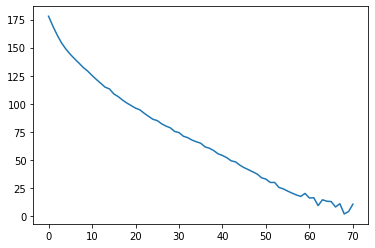

In [550]:
plt.plot(error)
plt.savefig('error.png')

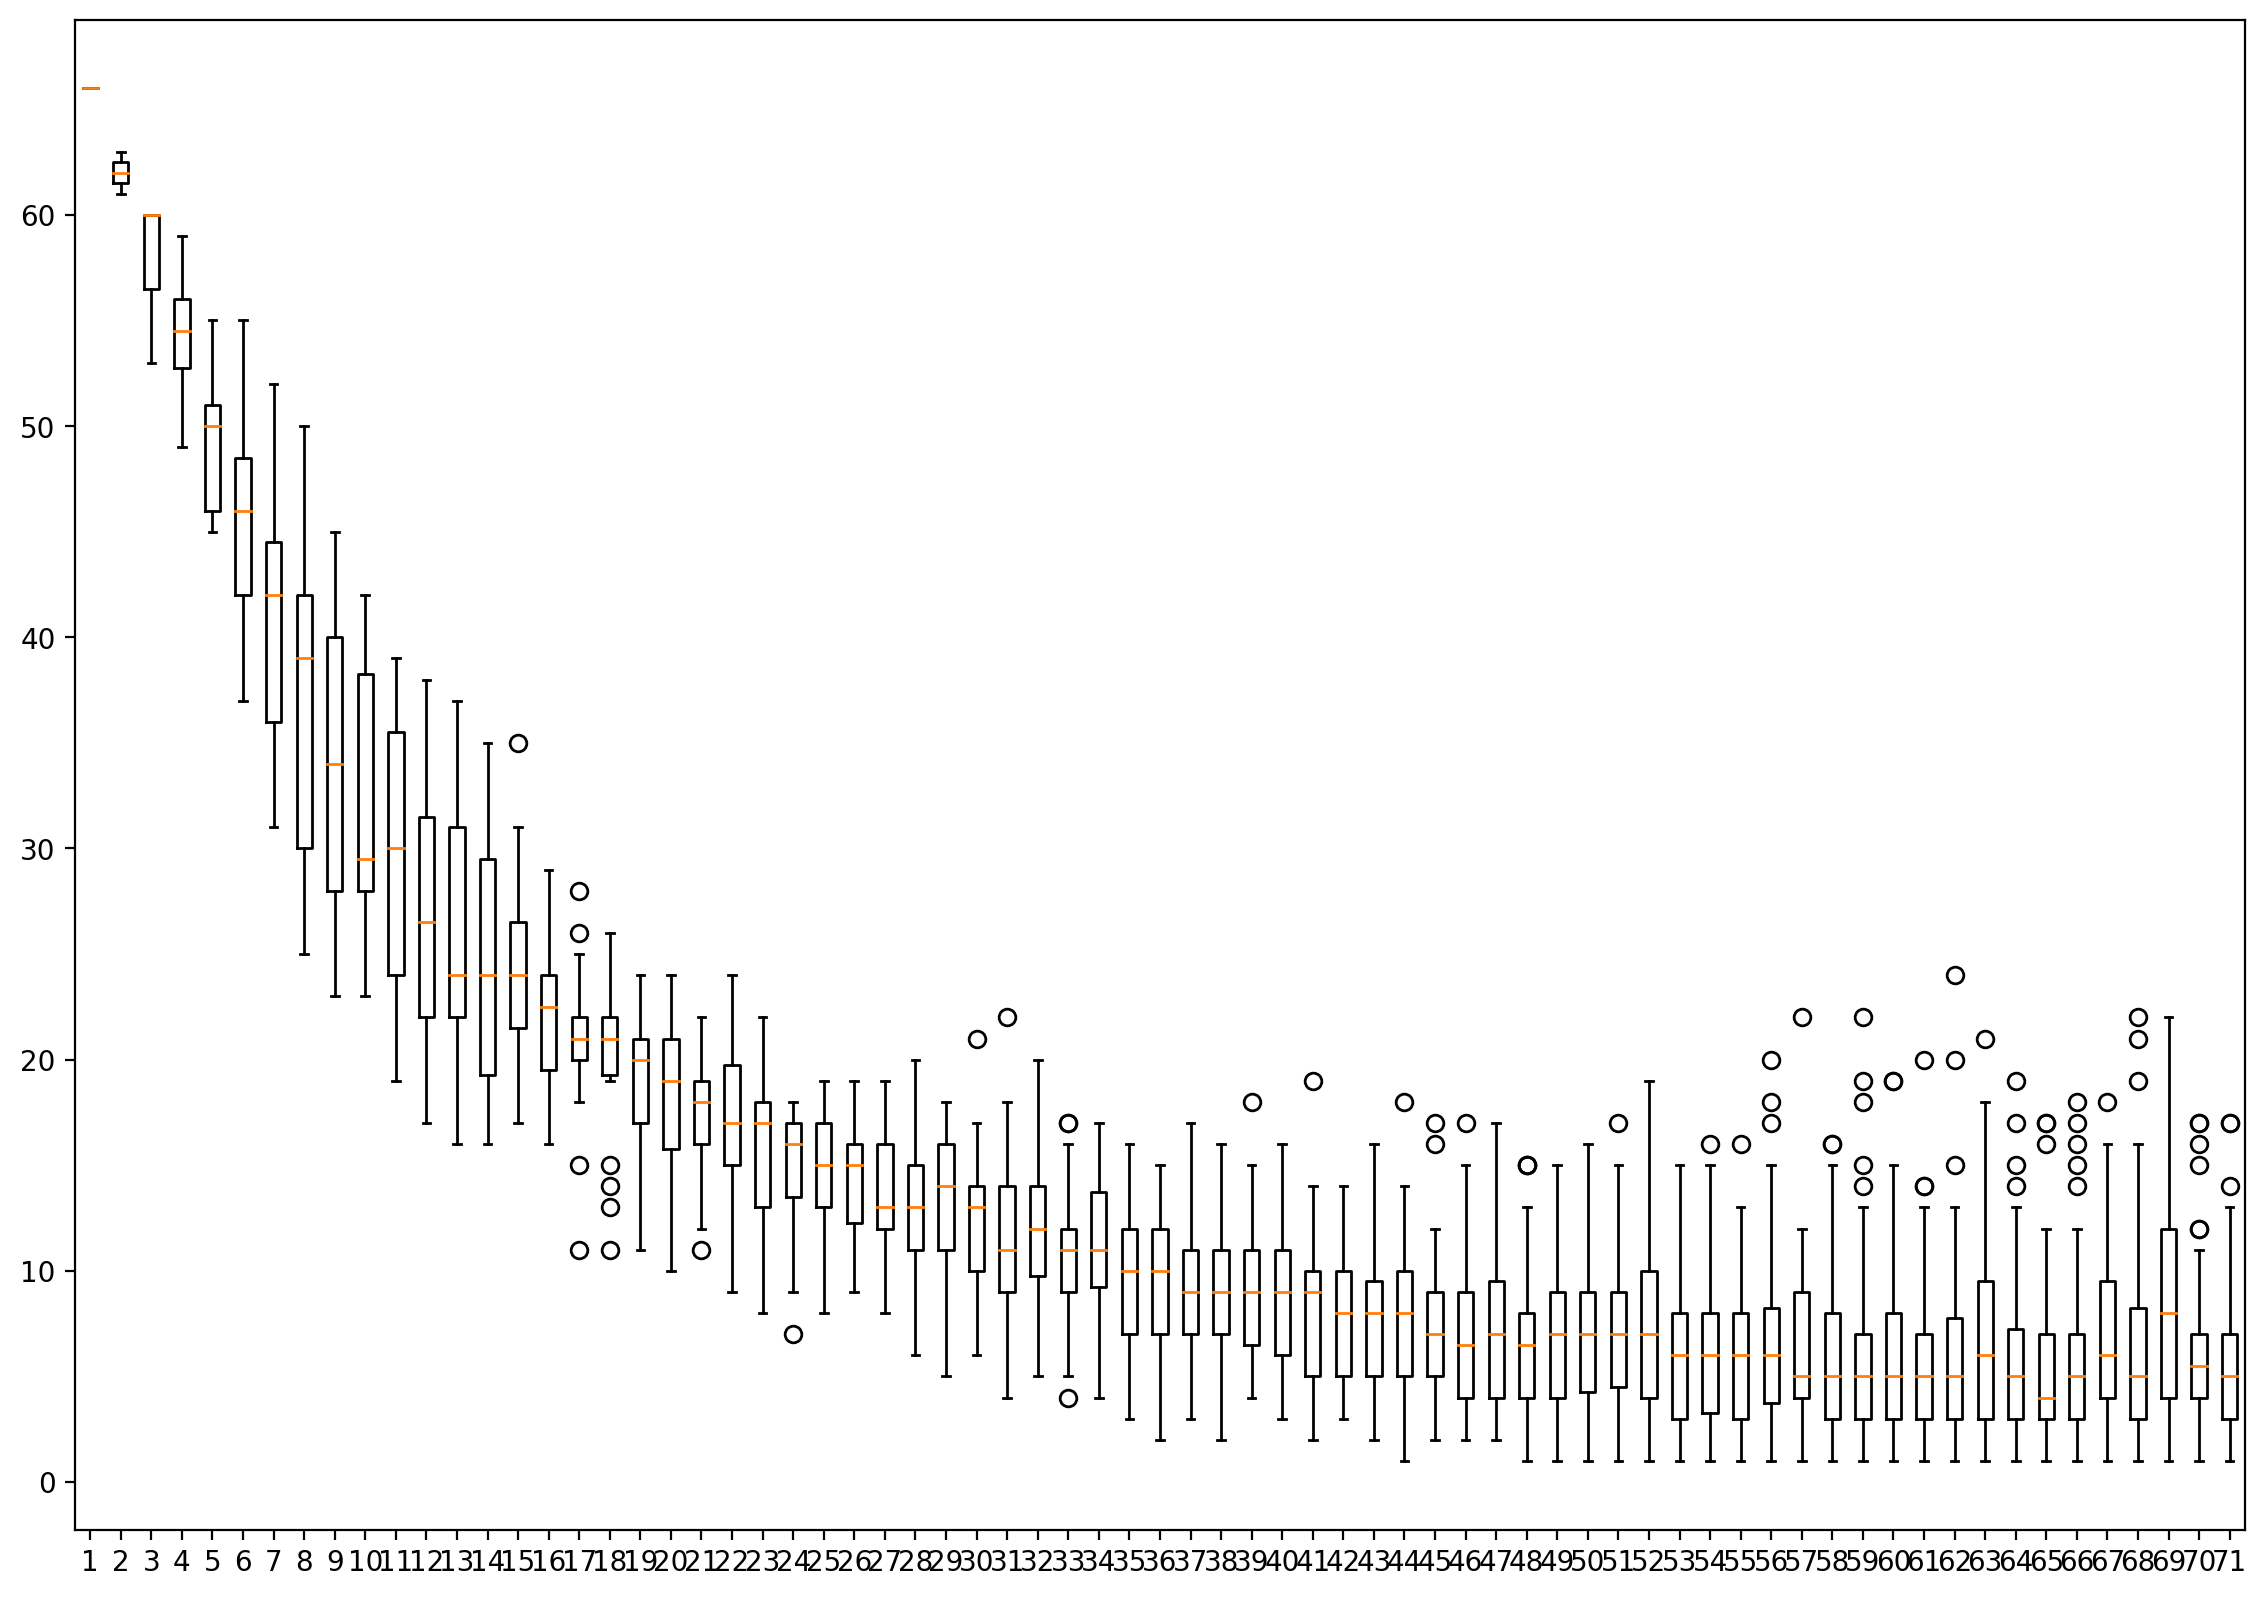

In [551]:
plt.figure(figsize=(14,10),dpi=200).add_subplot().boxplot(non_zeros)
plt.savefig('non-zeros.png')

In [163]:
def print_ipa(P,j):
    p = P[:,j]
    return ipa[p.nonzero()[0]]

In [235]:
def get_eng_ipa(P,j):
    p = P[:44,j]
    return ipa[:44][p.nonzero()[0]]

In [570]:
target = "aɪm ˈhɜrtɪŋ, ˈbeɪbi, aɪm ˈbroʊkən daʊn aɪ nid jʊər ˈlʌvɪŋ, ˈlʌvɪŋ, aɪ nid ɪt naʊ wɛn aɪm wɪˈθaʊt ju aɪm ˈsʌmθɪŋ wik ju gɑt mi ˈbɛgɪŋ ˈbɛgɪŋ, aɪm ɑn maɪ niz aɪ doʊnt ˈwɑnə bi ˈnidɪŋ jʊər lʌv aɪ ʤʌst ˈwɑnə bi dip ɪn jʊər lʌv ænd ɪts ˈkɪlɪŋ mi wɛn jʊr əˈweɪ u, ˈbeɪbi, kəz aɪ ˈrɪli doʊnt kɛr wɛr ju ɑr aɪ ʤʌst ˈwɑnə bi ðɛr wɛr ju ɑr ænd aɪ ˈgɑtə gɛt wʌn ˈlɪtəl teɪst jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi aɪm raɪt hir, kəz aɪ nid ˈlɪtəl lʌv ænd ˈlɪtəl ˈsɪmpəθi jæ ju ʃoʊ mi gʊd ˈlʌvɪŋ meɪk ɪt ˌɔlˈraɪt nid ə ˈlɪtəl ˈswitnəs ɪn maɪ laɪf jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi maɪ ˈbroʊkən ˈpisəz ju pɪk ðɛm ʌp doʊnt liv mi ˈhæŋɪŋ, ˈhæŋɪŋ kʌm gɪv mi sʌm wɛn aɪm wɪˈθaʊt jɑ aɪm soʊ ˈɪnsəkjər ju ɑr ðə wʌn θɪŋ ðə wʌn θɪŋ, aɪm ˈlɪvɪŋ fɔr aɪ doʊnt ˈwɑnə bi ˈnidɪŋ jʊər lʌv aɪ ʤʌst ˈwɑnə bi dip ɪn jʊər lʌv ænd ɪts ˈkɪlɪŋ mi wɛn jʊr əˈweɪ u, ˈbeɪbi, kəz aɪ ˈrɪli doʊnt kɛr wɛr ju ɑr aɪ ʤʌst ˈwɑnə bi ðɛr wɛr ju ɑr ænd aɪ ˈgɑtə gɛt wʌn ˈlɪtəl teɪst jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi aɪm raɪt hir, kəz aɪ nid ˈlɪtəl lʌv ænd ˈlɪtəl ˈsɪmpəθi jæ ju ʃoʊ mi gʊd ˈlʌvɪŋ meɪk ɪt ˌɔlˈraɪt nid ə ˈlɪtəl ˈswitnəs ɪn maɪ laɪf jʊər ˈʃʊgər (jʊər ˈʃʊgər) jɛs, pliz (jɛs, pliz) woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi jæ aɪ wɑnt ðæt rɛd ˈvɛlvət aɪ wɑnt ðæt ˈʃʊgər swit doʊnt lɛt ˈnoʊˌbɑˌdi tʌʧ ɪt ənˈlɛs ðæt ˈsʌmˌbɑdiz mi aɪ ˈgɑtə bi ə mən ðɛr eɪnt noʊ ˈʌðər weɪ kəz gɜrl jʊr ˈhɑtər ðæn ˈsʌðərn ˌkæləˈfɔrnjə beɪ aɪ doʊnt ˈwɑnə pleɪ noʊ geɪmz aɪ doʊnt ˈgɑtə bi əˈfreɪd doʊnt gɪv ɔl ðæt ʃaɪ ʃɪt noʊ meɪk ʌp ɑn, ðæts maɪ ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi (daʊn ɑn mi) oʊ, raɪt hir (raɪt hir), kəz aɪ nid (aɪ nid) ˈlɪtəl lʌv ænd ˈlɪtəl ˈsɪmpəθi jæ ju ʃoʊ mi gʊd ˈlʌvɪŋ meɪk ɪt ˌɔlˈraɪt nid ə ˈlɪtəl ˈswitnəs ɪn maɪ laɪf jʊər ˈʃʊgər (ˈʃʊgər) jɛs, pliz (jɛs, pliz) woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi aɪm raɪt hir, kəz aɪ nid ˈlɪtəl lʌv ænd ˈlɪtəl ˈsɪmpəθi jæ ju ʃoʊ mi gʊd ˈlʌvɪŋ meɪk ɪt ˌɔlˈraɪt nid ə ˈlɪtəl ˈswitnəs ɪn maɪ laɪf jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi (daʊn ɑn mi, daʊn ɑn mi)"

In [767]:
target2 = "ðɪs eɪnt ə sɔŋ fɔr ðə ˈbroʊkən-ˈhɑrtəd (woah oʊ, woah oʊ, oʊ) noʊ ˈsaɪlənt prɛr fɔr ðə feɪθ-dɪˈpɑrtəd aɪ eɪnt ˈgɑnə bi ʤʌst ə feɪs ɪn ðə kraʊd jʊr ˈgɑnə hir maɪ vɔɪs wɛn aɪ ʃaʊt ɪt aʊt laʊd ɪts maɪ laɪf, ɪts naʊ ɔr ˈnɛvər aɪ eɪnt ˈgɑnə lɪv fəˈrɛvər aɪ ʤʌst wɑnt tu lɪv waɪl aɪm əˈlaɪv (ɪts maɪ laɪf) maɪ hɑrt ɪz laɪk ən ˈoʊpən ˈhaɪˌweɪ laɪk ˈfræŋki sɛd, 'aɪ dɪd ɪt maɪ weɪ' aɪ ʤʌst ˈwɑnə lɪv waɪl aɪm əˈlaɪv ɪts maɪ laɪf ðɪs ɪz fɔr ðə wʌnz hu stʊd ðɛr graʊnd fɔr ˈtɑmi ænd ˈʤinə hu ˈnɛvər bækt daʊn təˈmɑˌroʊz ˈgɛtɪŋ ˈhɑrdər meɪk noʊ mɪsˈteɪk lʌk eɪnt ˈivɪn ˈlʌki, gɑt tu meɪk jʊər oʊn breɪks ɪts maɪ laɪf, ɪts naʊ ɔr ˈnɛvər aɪ eɪnt ˈgɑnə lɪv fəˈrɛvər aɪ ʤʌst wɑnt tu lɪv waɪl aɪm əˈlaɪv (ɪts maɪ laɪf) maɪ hɑrt ɪz laɪk ən ˈoʊpən ˈhaɪˌweɪ laɪk ˈfræŋki sɛd, 'aɪ dɪd ɪt maɪ weɪ' aɪ ʤʌst ˈwɑnə lɪv waɪl aɪm əˈlaɪv kəz ɪts maɪ laɪf ˈbɛtər stænd tɔl wɛn ðɛr ˈkɔlɪŋ ju aʊt doʊnt bɛnd, doʊnt breɪk, ˈbeɪbi, doʊnt bæk daʊn ɪts maɪ laɪf, ɪts naʊ ɔr ˈnɛvər aɪ eɪnt ˈgɑnə lɪv fəˈrɛvər aɪ ʤʌst wɑnt tu lɪv waɪl aɪm əˈlaɪv (ɪts maɪ laɪf) maɪ hɑrt ɪz laɪk ən ˈoʊpən ˈhaɪˌweɪ laɪk ˈfræŋki sɛd, 'aɪ dɪd ɪt maɪ weɪ' aɪ ʤʌst ˈwɑnə lɪv waɪl aɪm əˈlaɪv ɪts maɪ laɪf ænd ɪts naʊ ɔr ˈnɛvər aɪ eɪnt ˈgɑnə lɪv fəˈrɛvər aɪ ʤʌst wɑnt tu lɪv waɪl aɪm əˈlaɪv (ɪts maɪ laɪf) maɪ hɑrt ɪz laɪk ən ˈoʊpən ˈhaɪˌweɪ laɪk ˈfræŋki sɛd, 'aɪ dɪd ɪt maɪ weɪ' aɪ ʤʌst ˈwɑnə lɪv waɪl aɪm əˈlaɪv ɪts maɪ laɪf"

In [878]:
target3 = "aɪm æt ə peɪ foʊn, ˈtraɪɪŋ tu kɔl hoʊm ɔl ʌv maɪ ʧeɪnʤ, aɪ spɛnt ɑn ju wɛr hæv ðə taɪmz gɔn? ˈbeɪbi, ɪts ɔl rɔŋ wɛr ɑr ðə plænz wi meɪd fɔr tu? jæ, aɪ, aɪ noʊ ɪts hɑrd tu rɪˈmɛmbər ðə ˈpipəl wi juzd tu bi ɪts ˈivɪn ˈhɑrdər tu ˈpɪkʧər ðæt jʊr nɑt hir nɛkst tu mi ju seɪ ɪts tu leɪt tu meɪk ɪt bʌt ɪz ɪt tu leɪt tu traɪ? ænd ɪn ˈaʊər taɪm ðæt ju ˈweɪstəd ɔl ʌv ˈaʊər ˈbrɪʤəz bɜrnd daʊn aɪv ˈweɪstəd maɪ naɪts ju tɜrnd aʊt ðə laɪts naʊ aɪm ˈpɛrəˌlaɪzd stɪl stʌk ɪn ðæt taɪm wɛn wi kɔld ɪt lʌv bʌt ˈivɪn ðə sʌn sɛts ɪn ˈpɛrəˌdaɪs aɪm æt ə peɪ foʊn, ˈtraɪɪŋ tu kɔl hoʊm ɔl ʌv maɪ ʧeɪnʤ aɪ spɛnt ɑn ju wɛr hæv ðə taɪmz gɔn? ˈbeɪbi, ɪts ɔl rɔŋ wɛr ɑr ðə plænz wi meɪd fɔr tu? ɪf ˈhæpi ˈɛvər ˈæftər dɪd ɪgˈzɪst aɪ wʊd stɪl bi ˈhoʊldɪŋ ju laɪk ðɪs ɔl ðoʊz ˈfɛriˌteɪlz ɑr fʊl ʌv ʃɪt wʌn mɔr ˈfʌkɪŋ lʌv sɔŋ, aɪl bi sɪk, oʊ ju tɜrnd jʊər bæk ɑn təˈmɑˌroʊ kəz ju fərˈgɑt ˈjɛstərˌdeɪ aɪ geɪv ju maɪ lʌv tu ˈbɑˌroʊ bʌt ju ʤʌst geɪv ɪt əˈweɪ ju kænt ɪkˈspɛkt mi tu bi faɪn aɪ doʊnt ɪkˈspɛkt ju tu kɛr aɪ noʊ aɪ sɛd ɪt bɪˈfɔr bʌt ɔl ʌv ˈaʊər ˈbrɪʤəz bɜrnd daʊn aɪv ˈweɪstəd maɪ naɪts ju tɜrnd aʊt ðə laɪts naʊ aɪm ˈpɛrəˌlaɪzd stɪl stʌk ɪn ðæt taɪm wɛn wi kɔld ɪt lʌv bʌt ˈivɪn ðə sʌn sɛts ɪn ˈpɛrəˌdaɪs aɪm æt ə payphone, ˈtraɪɪŋ tu kɔl hoʊm ɔl ʌv maɪ ʧeɪnʤ aɪ spɛnt ɑn ju wɛr hæv ðə taɪmz gɔn? ˈbeɪbi, ɪts ɔl rɔŋ wɛr ɑr ðə plænz wi meɪd fɔr tu? ɪf ˈhæpi ˈɛvər ˈæftər dɪd ɪgˈzɪst aɪ wʊd stɪl bi ˈhoʊldɪŋ ju laɪk ðɪs ænd ɔl ðoʊz ˈfɛriˌteɪlz ɑr fʊl ʌv ʃɪt wʌn mɔr ˈfʌkɪŋ lʌv sɔŋ, aɪl bi sɪk naʊ, aɪm æt ə peɪ foʊn ʌ mən, fʌk ðæt ʃɪt aɪl bi aʊt ˈspɛndɪŋ ɔl ðɪs ˈmʌni waɪl jʊr ˈsɪtɪŋ raʊnd ˈwʌndərɪŋ waɪ ɪt ˈwɑzənt ju hu keɪm ʌp frʌm ˈnʌθɪŋ meɪd ɪt frʌm ðə ˈbɑtəm naʊ wɛn ju si mi, aɪm ˈstʌntɪn ænd ɔl ʌv maɪ kɑrz stɑrt wɪð ðə pʊʃ ʌv ə ˈbʌtən ˈtɛlɪŋ mi aɪ ʧeɪnʤd sɪns aɪ blu ʌp ɔr ˌwʌˈtɛvər ju kɔl ɪt swɪʧt ðə ˈnʌmbər tu maɪ foʊn soʊ ju ˈnɛvər kʊd kɔl ɪt doʊnt nid maɪ neɪm ɑn maɪ ʃɜrt, ju kæn tɛl ðæt aɪm ˈbælɪn swɪʃ, wʌt ə ʃeɪm, coulda gɑt pɪkt hæd ə ˈrɪli gʊd geɪm, bʌt ju mɪst jʊər læst ʃɑt soʊ ju tɔk əˈbaʊt hu ju si æt ðə tɑp ɔr wʌt ju kʊdəv sɔ, bʌt sæd tu seɪ ɪts ˈoʊvər fɔr ˈfæntəm pʊld ʌp, væˈleɪ ˈoʊpən dɔrz wɪʃt aɪd goʊ əˈweɪ, gɑt wʌt ju wʌz ˈlʊkɪŋ fɔr naʊ ɪts mi hu ðeɪ wɑnt soʊ ju kæn goʊ teɪk ðæt ˈlɪtəl pis ʌv ʃɪt wɪð ju aɪm æt ə peɪ foʊn, ˈtraɪɪŋ tu kɔl hoʊm ɔl ʌv maɪ ʧeɪnʤ aɪ spɛnt ɑn ju wɛr hæv ðə taɪmz gɔn? ˈbeɪbi, ɪts ɔl rɔŋ wɛr ɑr ðə plænz wi meɪd fɔr tu? ɪf ˈhæpi ˈɛvər ˈæftər dɪd ɪgˈzɪst aɪ wʊd stɪl bi ˈhoʊldɪŋ ju laɪk ðɪs ænd ɔl ðiz ˈfɛriˌteɪlz ɑr fʊl ʌv ʃɪt wʌn mɔr ˈfʌkɪŋ lʌv sɔŋ, aɪl bi sɪk naʊ, aɪm æt ə peɪ foʊn"

## k=33をみる

In [811]:
model = NMF(n_components=33, init='random', random_state=0)
P = model.fit_transform(data)
Q = model.components_

## 再構成誤差が低い歌詞の部位を出す

In [370]:
def ipa_to_array(target):
    ipa_e = ['iː', 'ɑː', 'ɔː', 'uː', 'ɜ:', 'eɪ', 'aɪ', 'ɔi', 'aʊ', 'əʊ', 'ɪə', 'eə', 'ʊə', 'tʃ', 'dʒ', 'ə', 'ɪ', 'e', 'æ', 'ɒ', 'ʌ', 'ʊ', 'p', 'b', 't', 'd', 'k', 'g', 'f', 'v', 'θ', 'ð', 's', 'z', 'ʃ', 'ʒ', 'h', 'm', 'n', 'ŋ', 'l', 'r', 'j', 'w']
    ipa = np.zeros(len(ipa_e))
    for i in range(len(ipa_e)):
        if target.count(ipa_e[i]) != 0:
            ipa[i] = target.count(ipa_e[i])
            target = target.replace(ipa_e[i], '')
    return ipa

In [236]:
def find_soramimi(target, window, P):
    scores = []
    for i in range(len(target) - window):
        tmp = target[i:(window+i)]
        score = []
        for j in range(P.shape[1]):
            score.append(0)
            for w in list(get_eng_ipa(P, j)):
                if tmp.count(w) != 0:
                    score[j] = score[j] + tmp.count(w)
        scores.append(score)
    return scores

In [272]:
scores = np.array(find_soramimi(target, 10, P))

In [282]:
maxes = []
for i in range(len(scores)):
    maxes.append(max(scores[i]))
maxes = np.array(maxes)

In [283]:
maxes.argmax()

1425

In [288]:
scores[1425].argmax()

25

In [286]:
target[1425:1435]

'æləˈfɔrnjə'

In [503]:
print_ipa(P,5)

45    i
60    h
Name: Unnamed: 0, dtype: object

In [845]:
def print_atom(coef, P):
    for index, num in enumerate(coef):
        if num != 0:
            print(index)
            print(print_ipa(P, index))

In [853]:
def print_atom_connect(coef, P):
    atom = np.zeros(71)
    for index, num in enumerate(coef):
        if num != 0:
            atom = atom + num * P[:,index]
    plt.figure(figsize=(18,5),dpi=100)
    plt.bar(ipa,atom)

In [854]:
def reconstruct_err(target, P):
    ipa_arr = string_to_ipa(target)
    coder = SparseCoder(dictionary = P[:44,:].T, transform_algorithm="lasso_lars", positive_code=True)
    ipa_arr = ipa_arr.reshape(44,1)
    coef = coder.transform(ipa_arr.T)
    err = np.absolute(ipa_arr - np.dot(P[:44,:], coef.T)).sum()
    return err

In [855]:
def reconstruct(target, P):
    ipa_arr = string_to_ipa(target)
    coder = SparseCoder(dictionary = P[:44,:].T, transform_algorithm="lasso_lars", positive_code=True)
    ipa_arr = ipa_arr.reshape(44,1)
    coef = coder.transform(ipa_arr.T)
    err = np.absolute(ipa_arr - np.dot(P[:44,:], coef.T)).sum()
    print(err)
    #print_atom(coef[0], P)
    print_atom_connect(coef[0], P)

In [856]:
def find_soramimi2(target, window, P):
    error = []
    for i in range(len(target) - window):
        tmp = target[i:(window+i)]
        error.append(reconstruct_err(tmp, P))
    return np.array(error)

In [876]:
def plot_soramimi(target, win, P):
    error = find_soramimi2(target, win, P)
    min_err = error.argsort()[0]
    tar = target[min_err:min_err+win]
    print(tar)
    reconstruct(tar, P)

nid maɪ neɪm ɑn maɪ 
2.5721103955916487


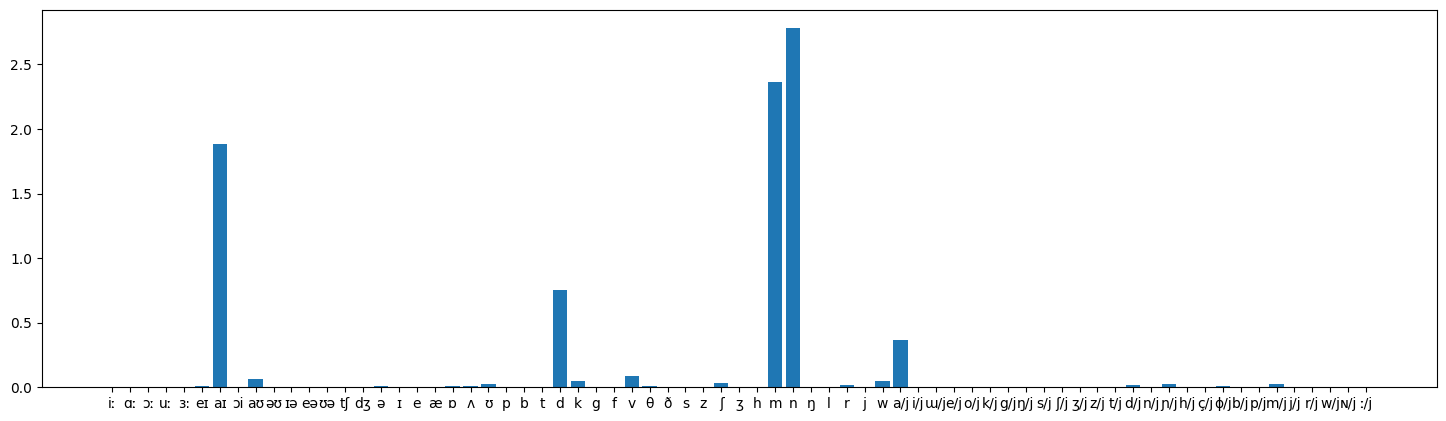

In [880]:
plot_soramimi(target3, 20, P)

## 基底を見る

In [697]:
ipa_index = ipa
for i in range(44,len(ipa)):
    ipa_index[i] = ipa_index[i] + '/j'

/usr/local/var/pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


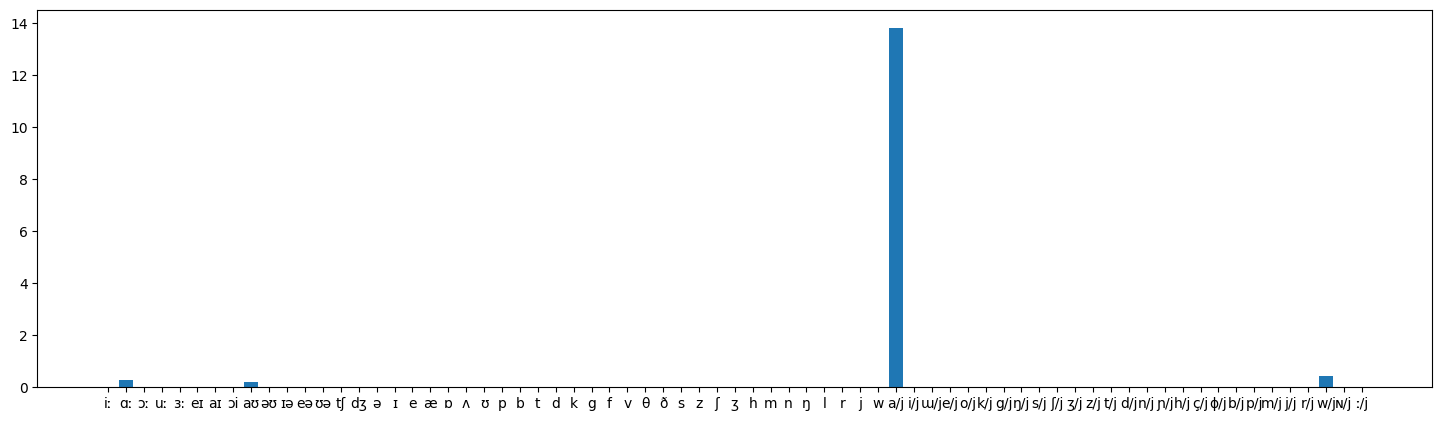

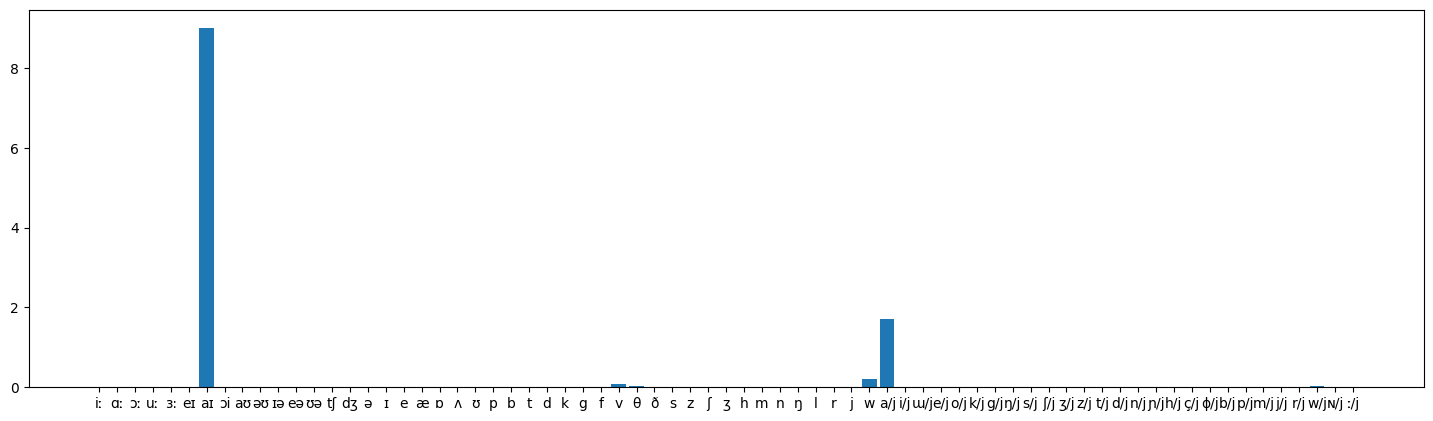

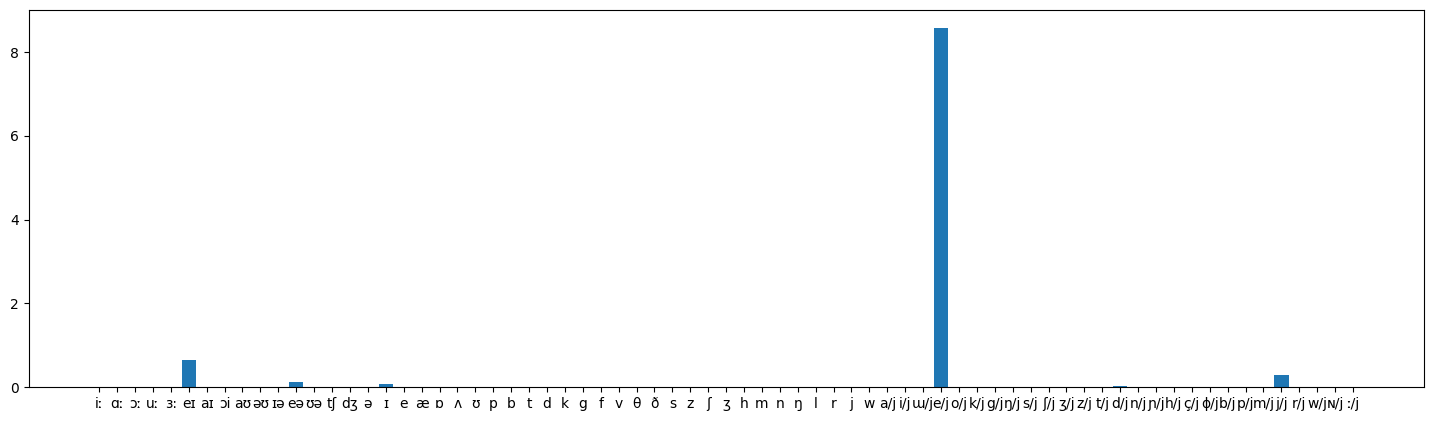

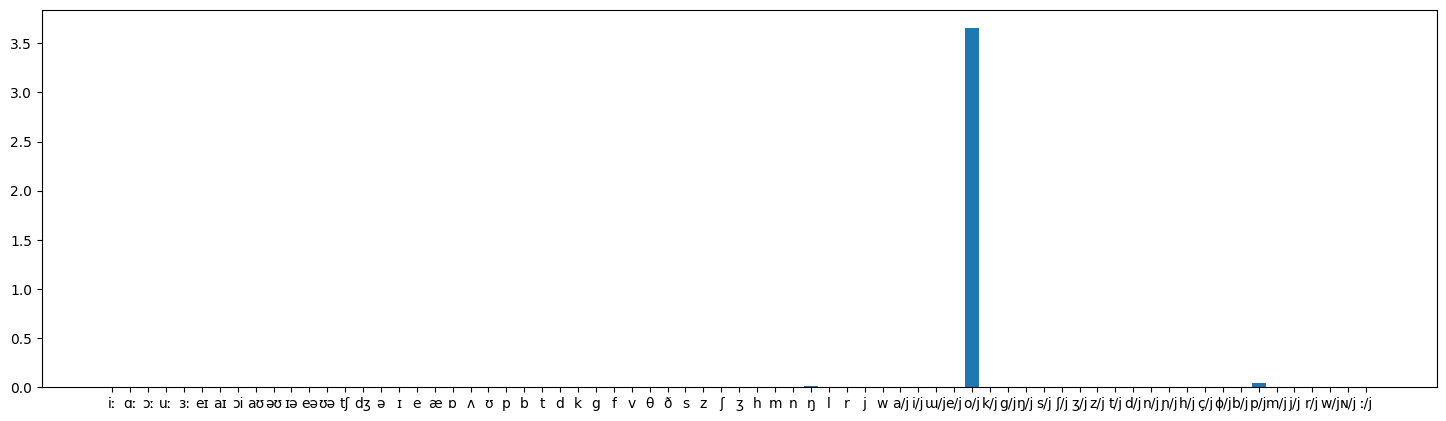

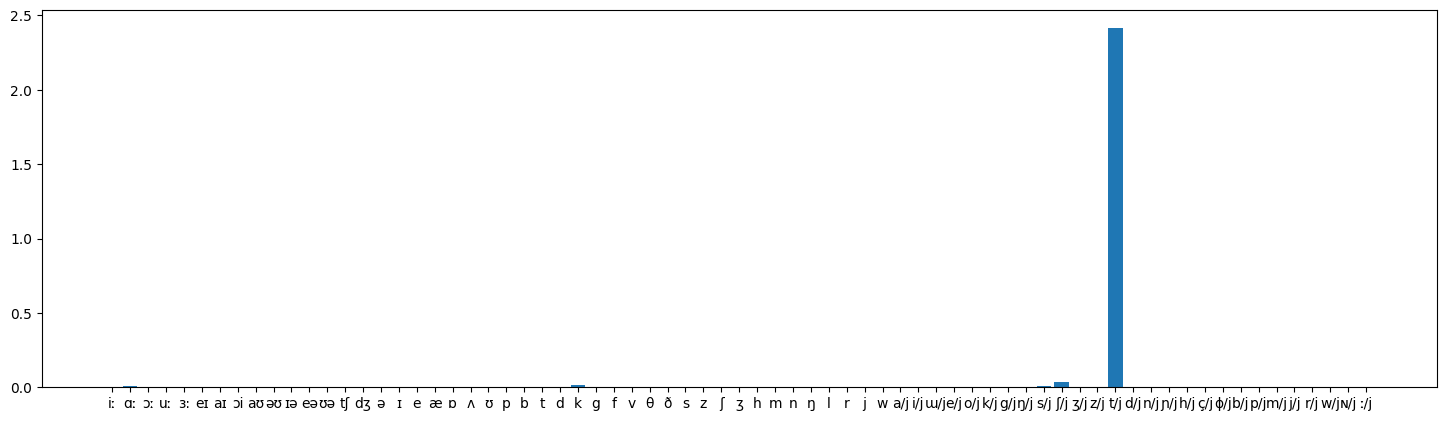

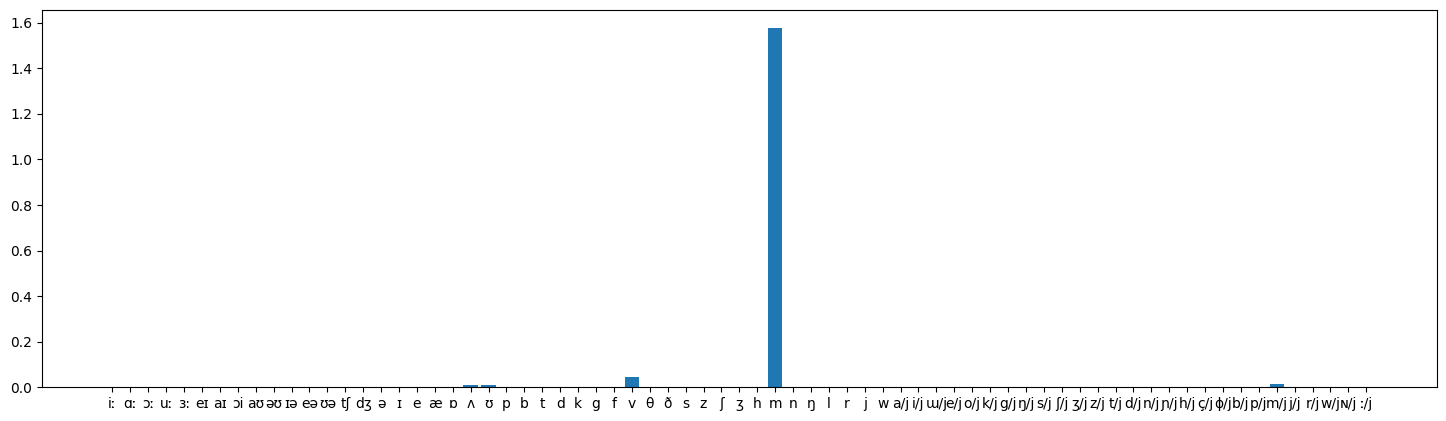

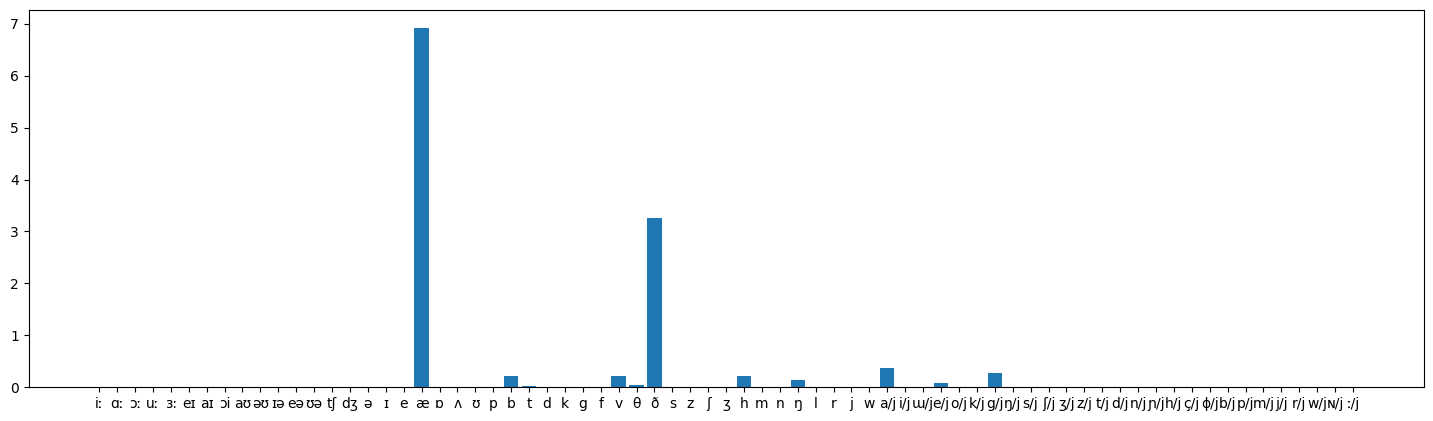

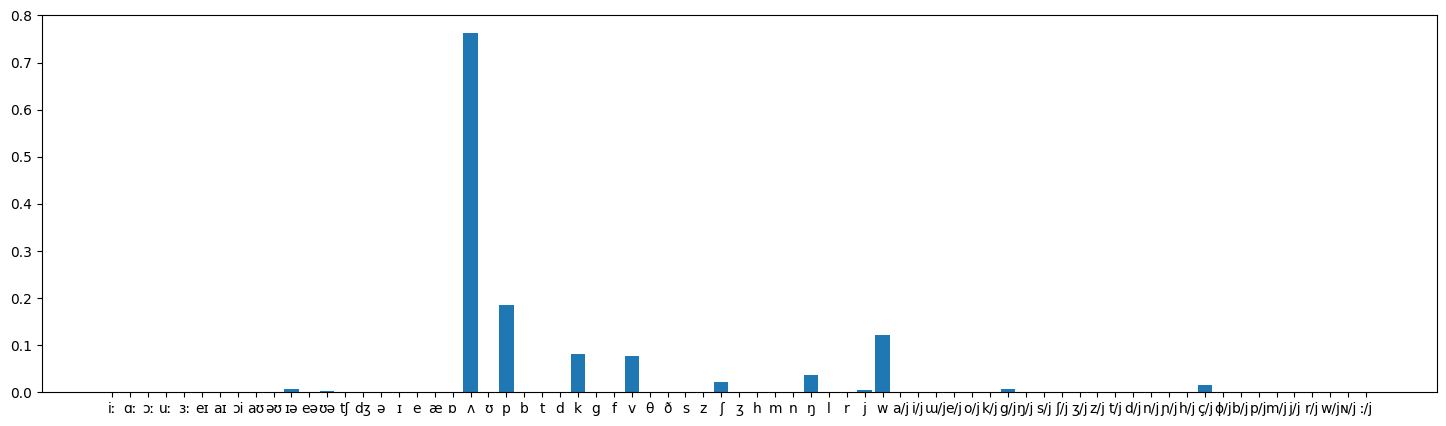

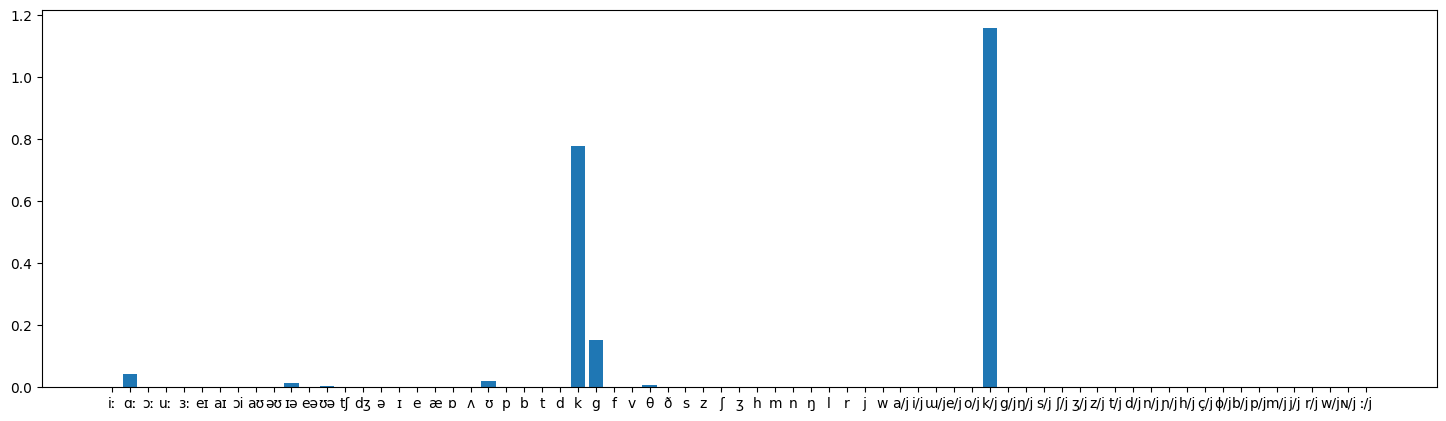

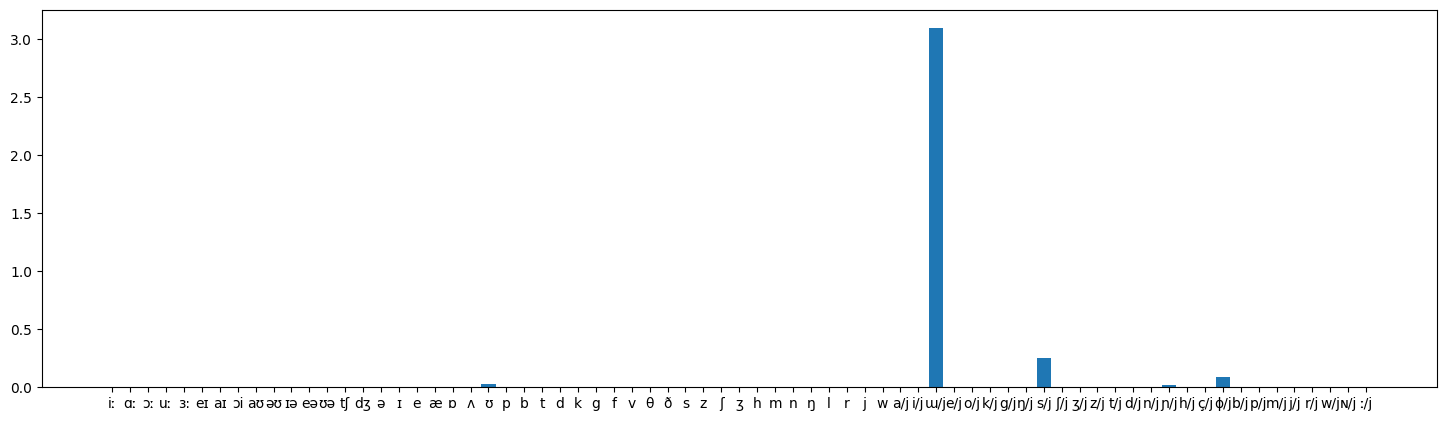

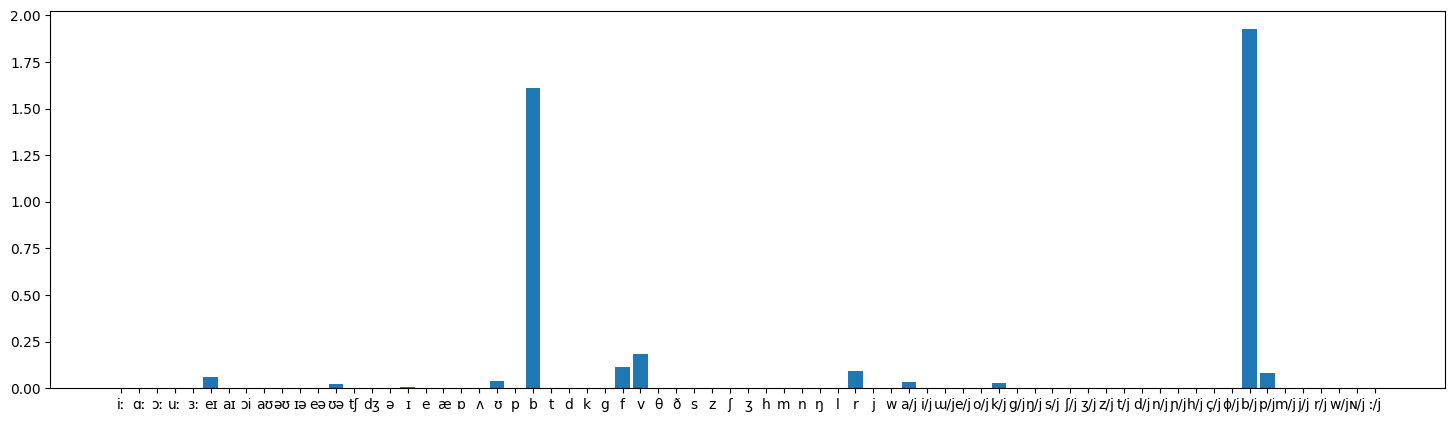

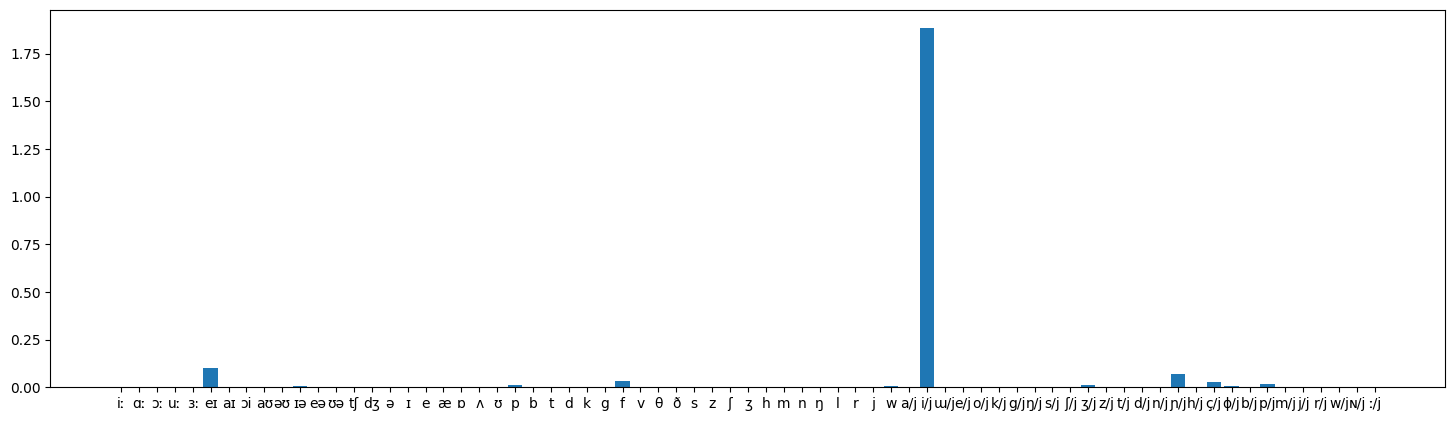

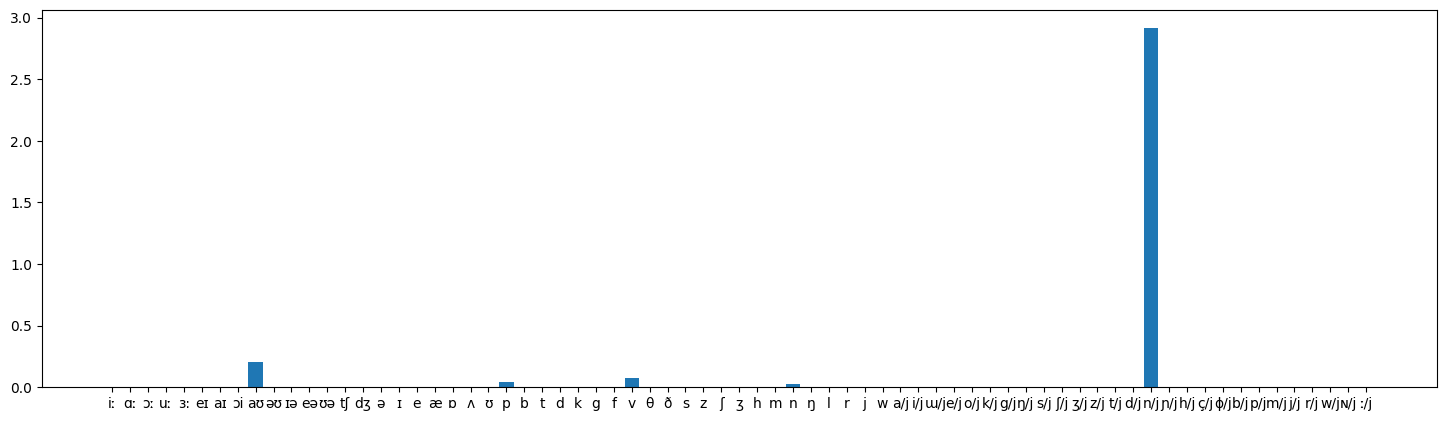

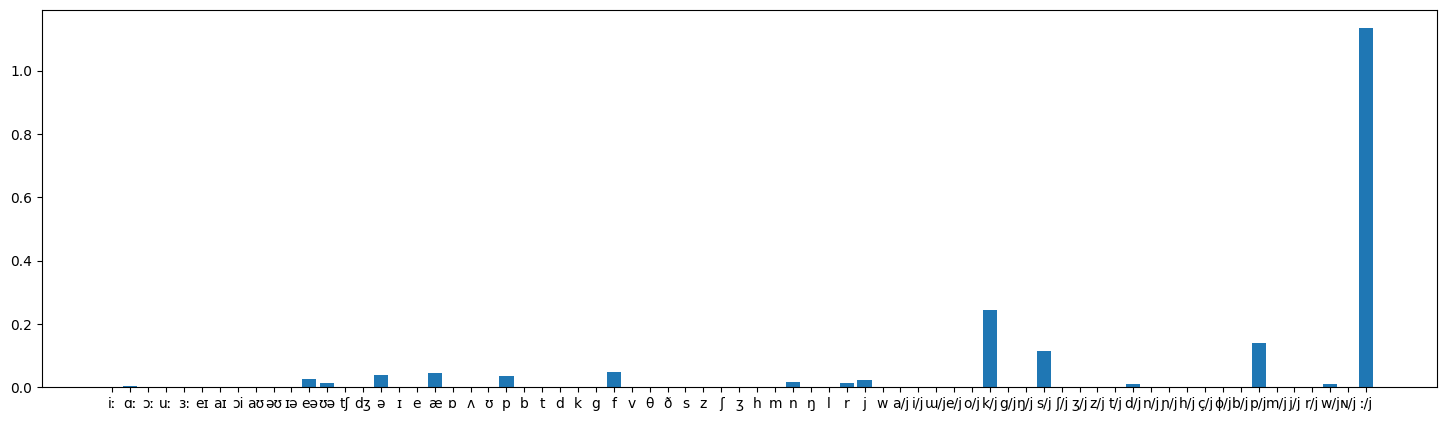

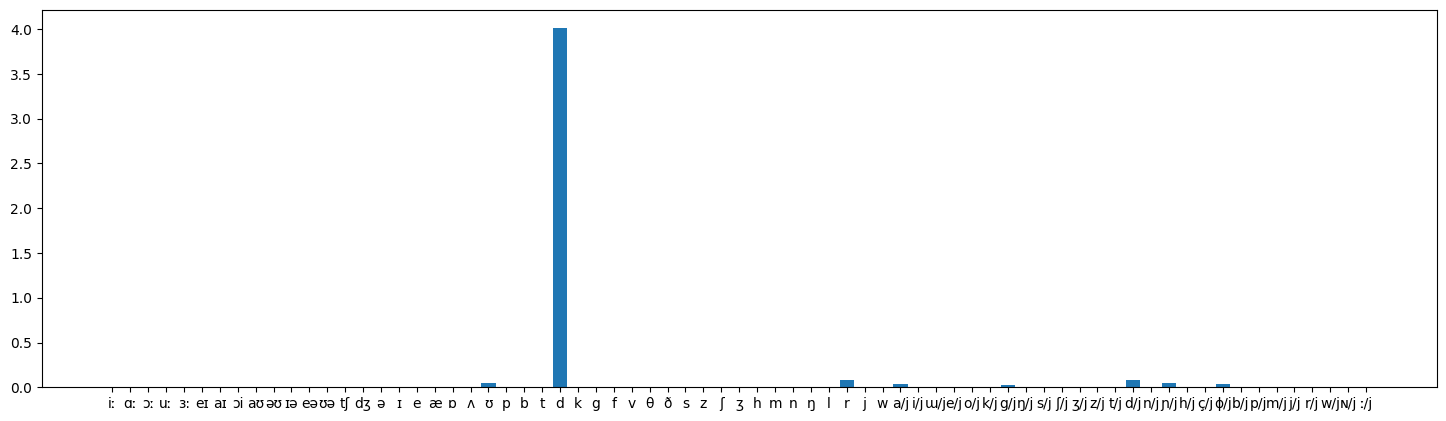

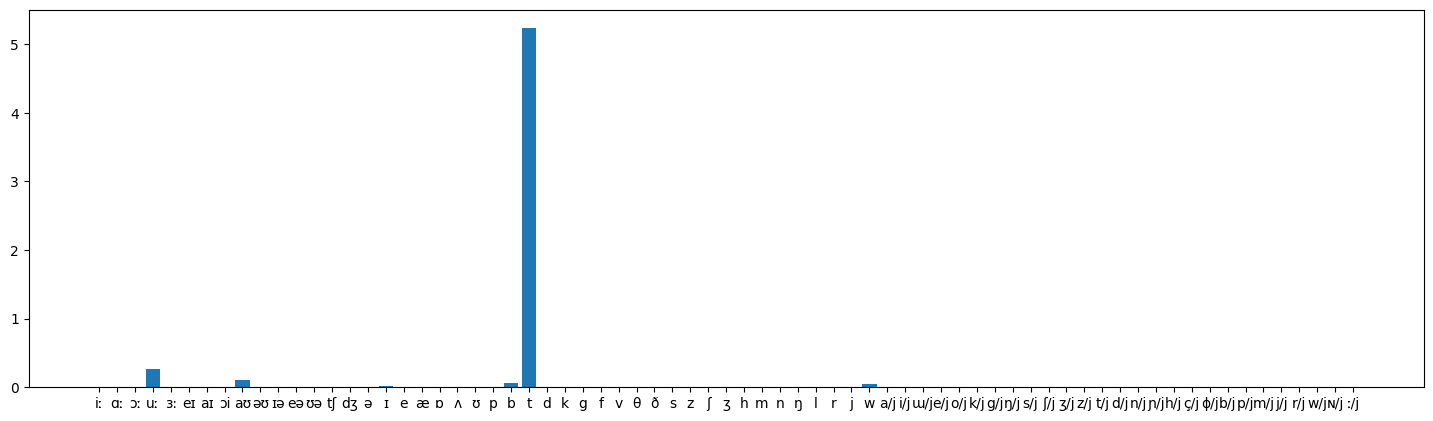

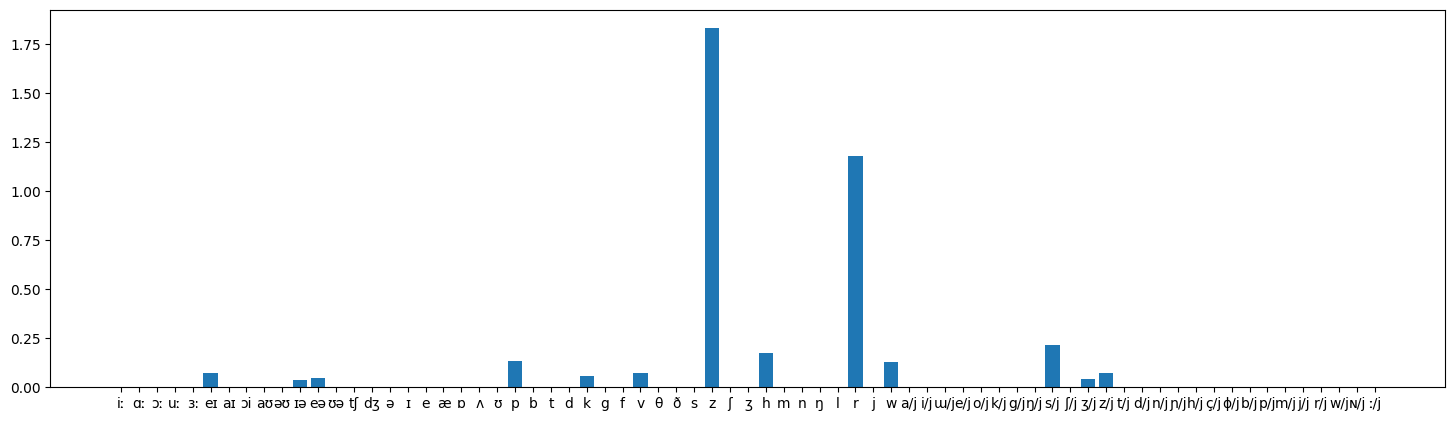

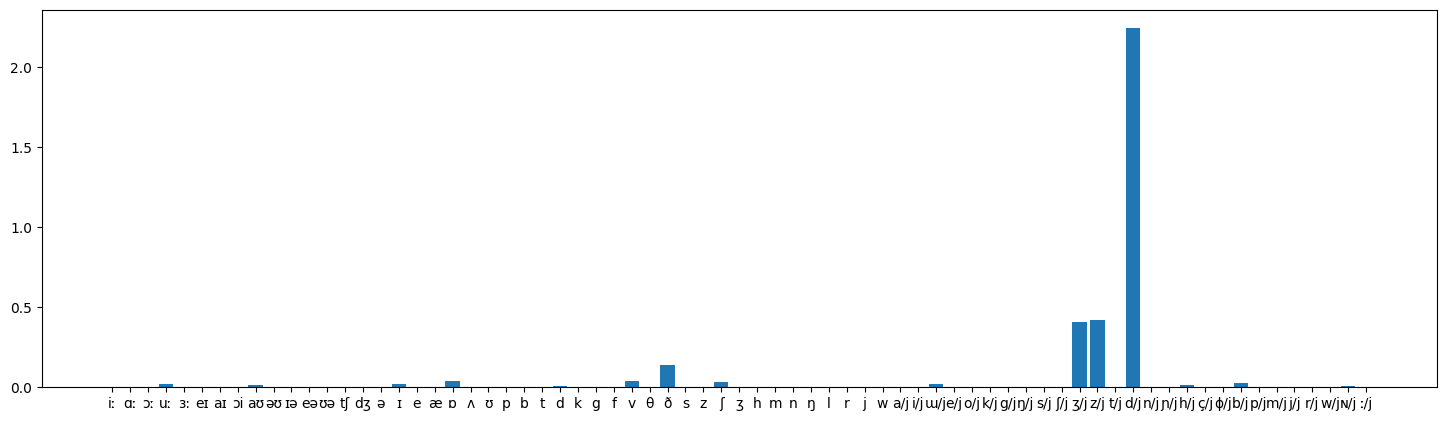

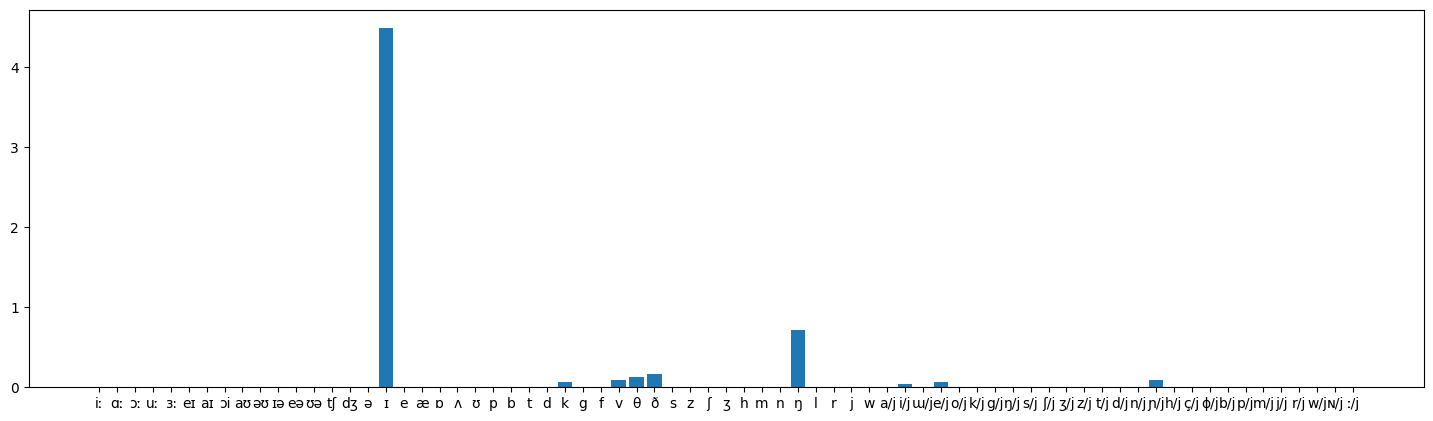

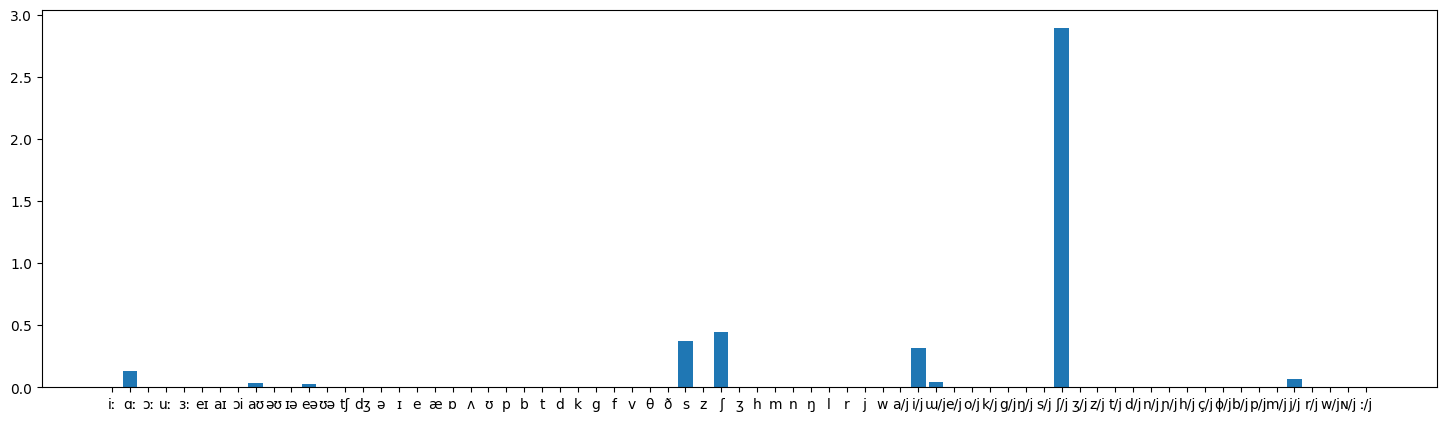

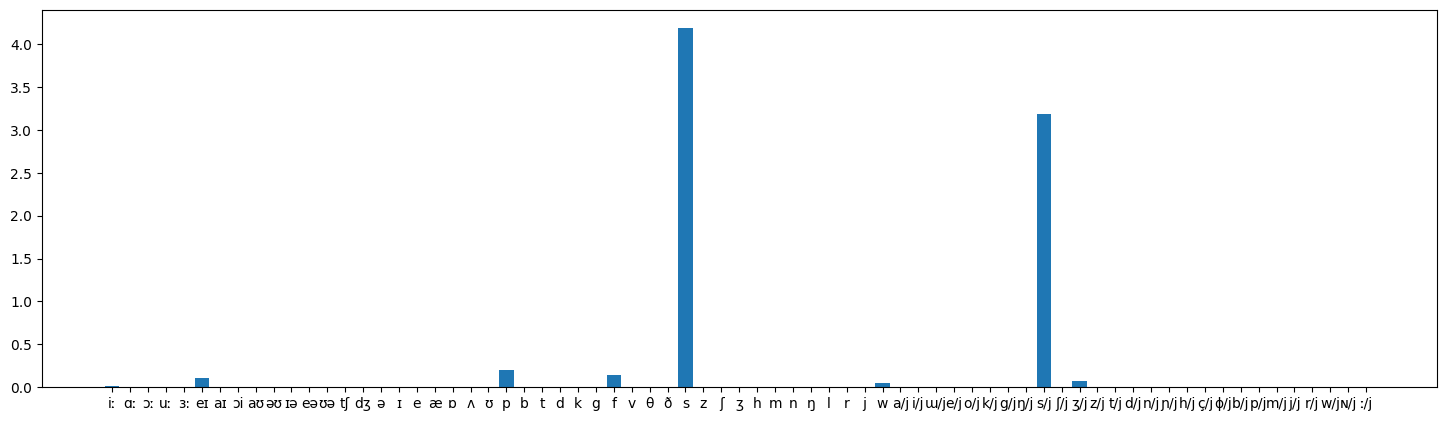

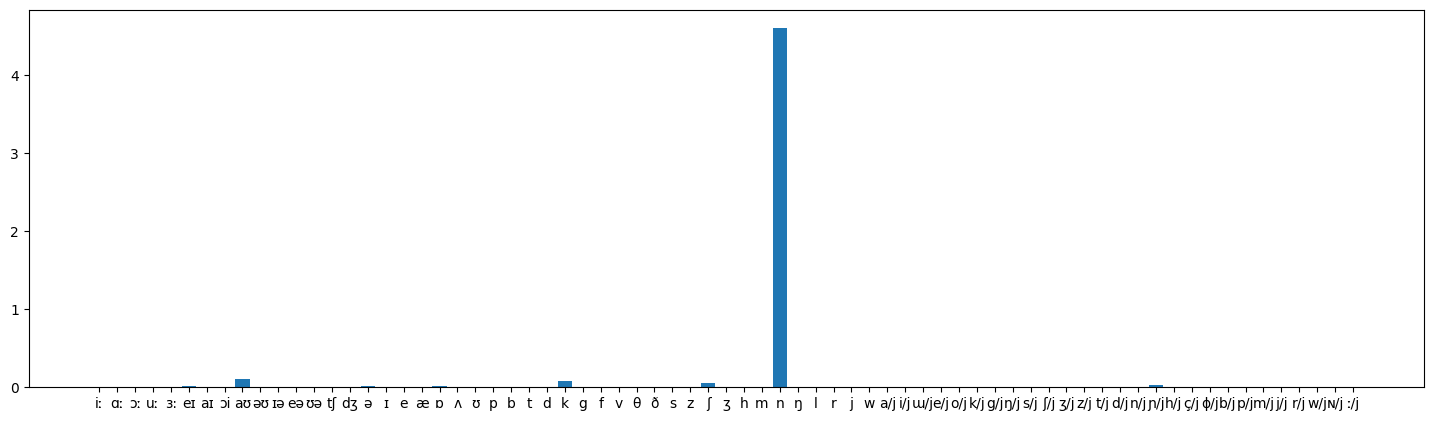

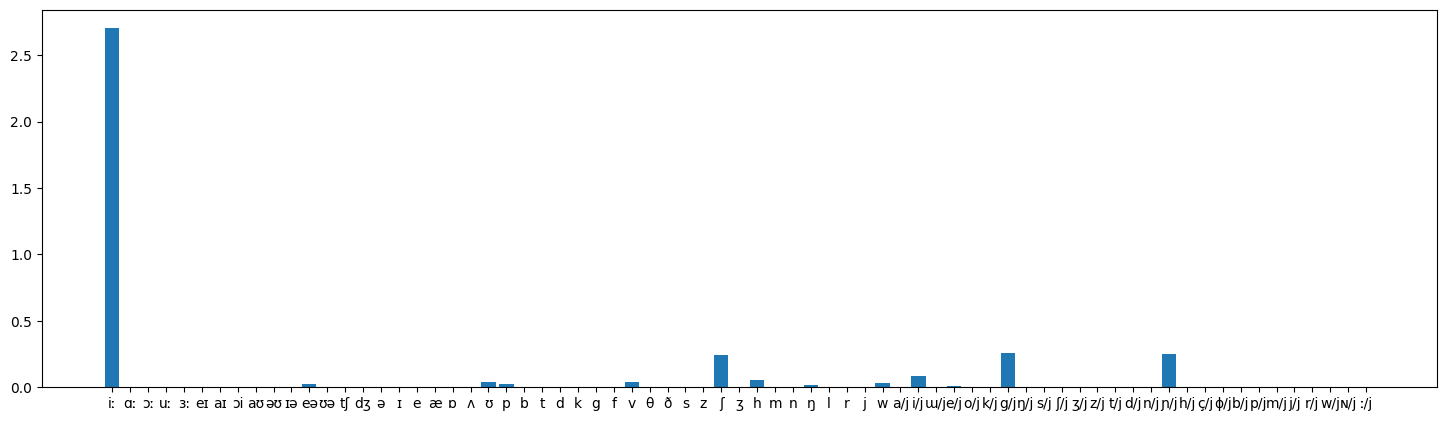

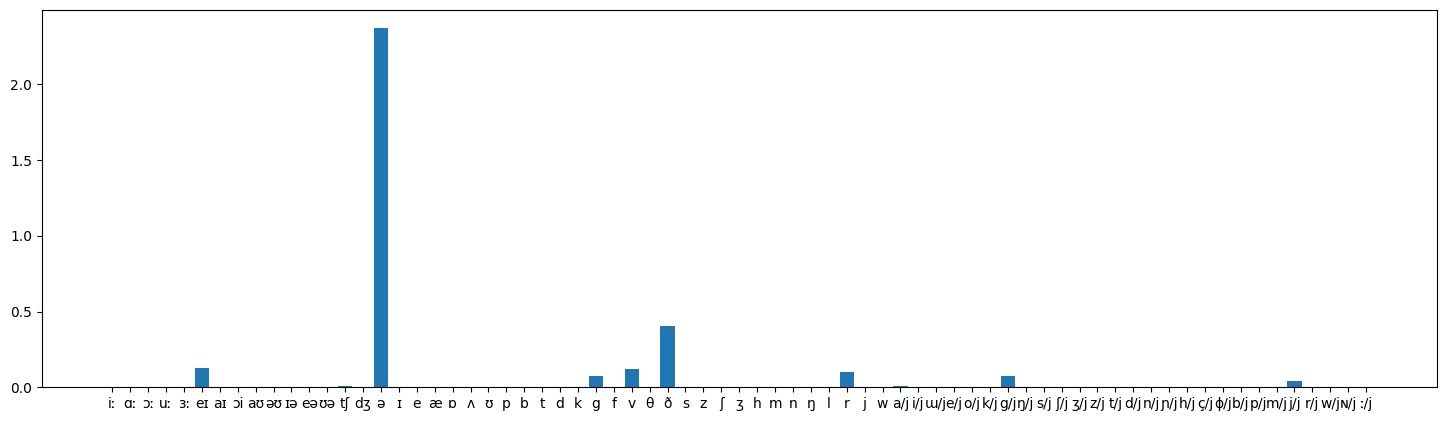

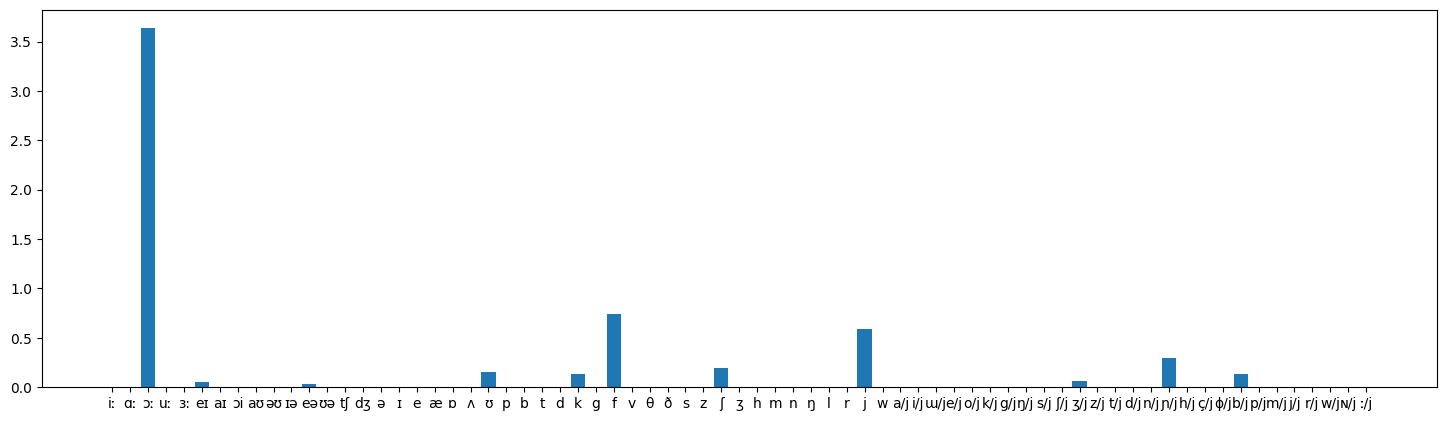

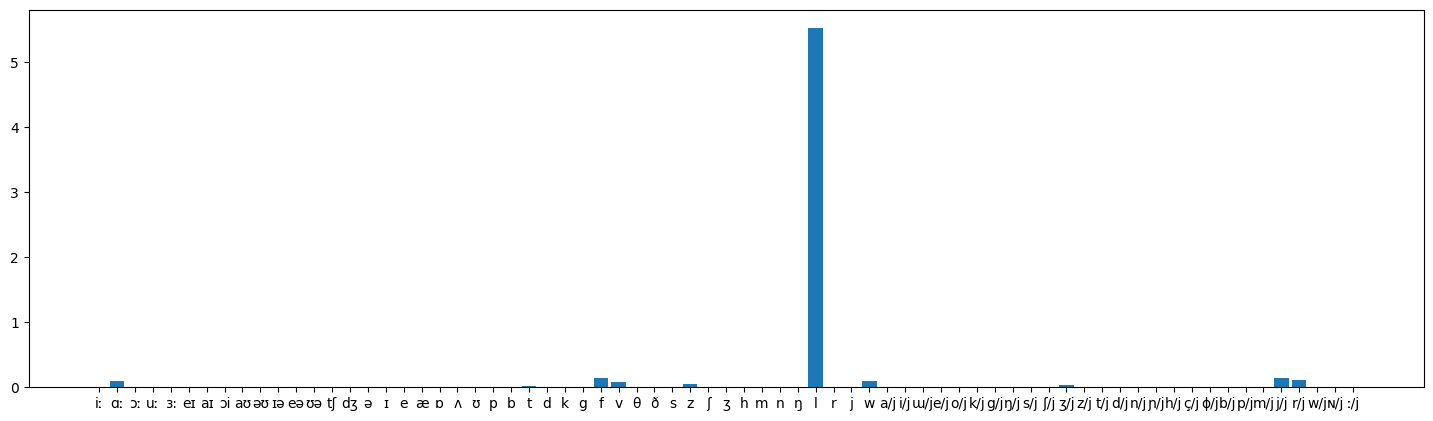

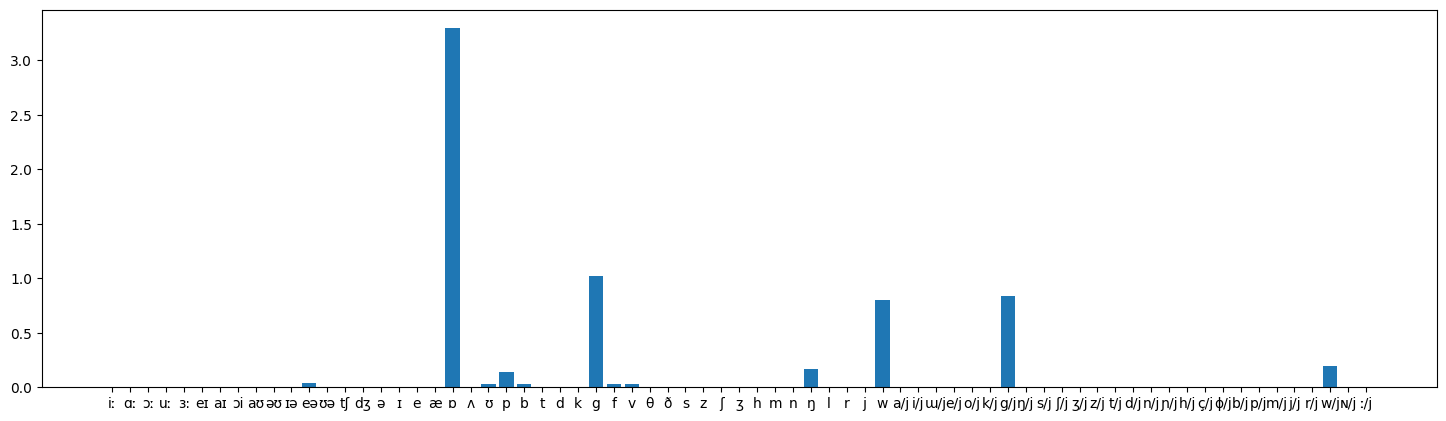

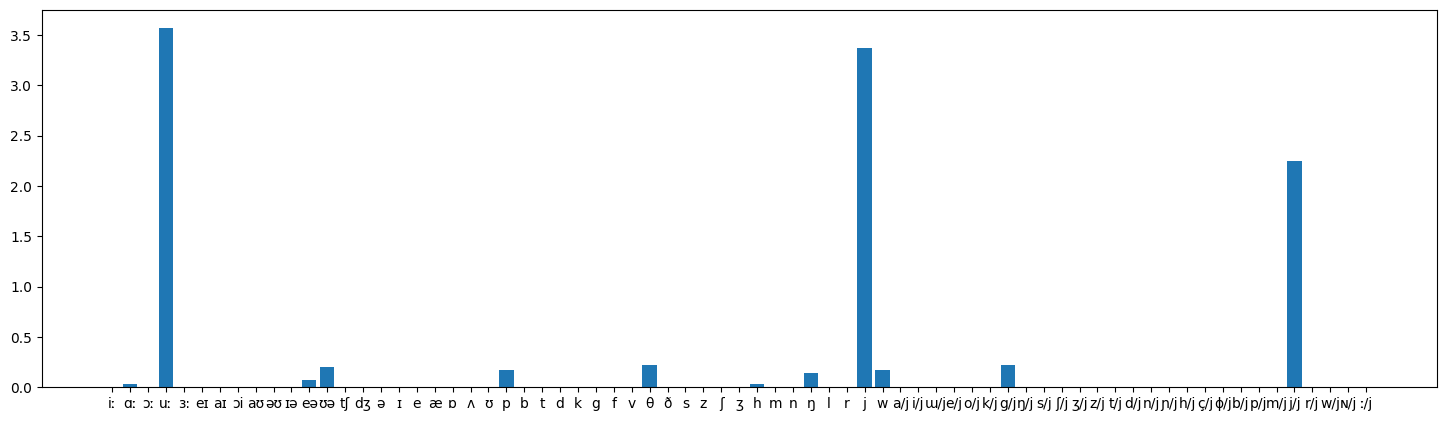

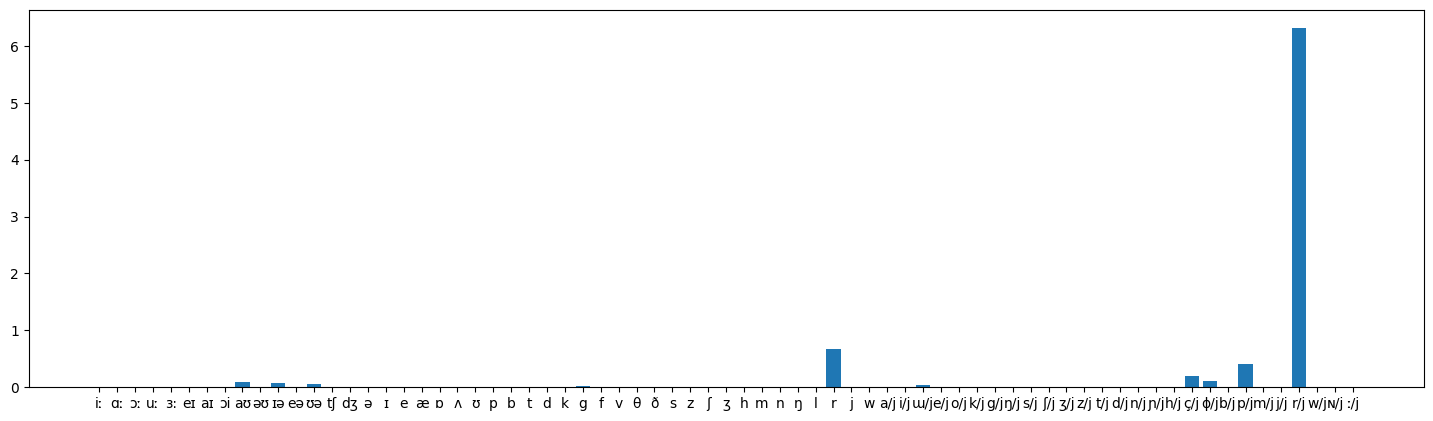

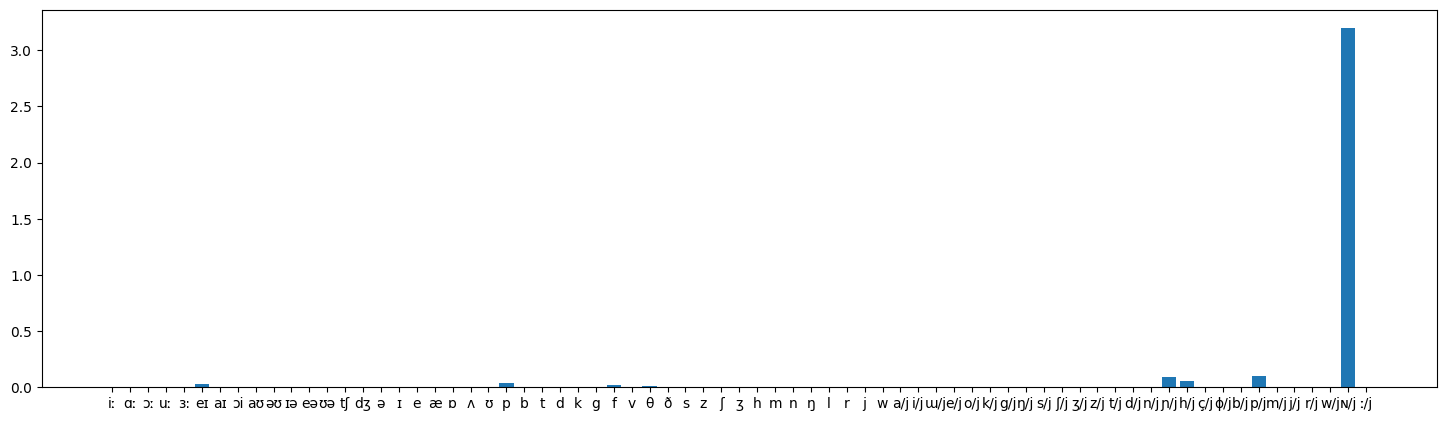

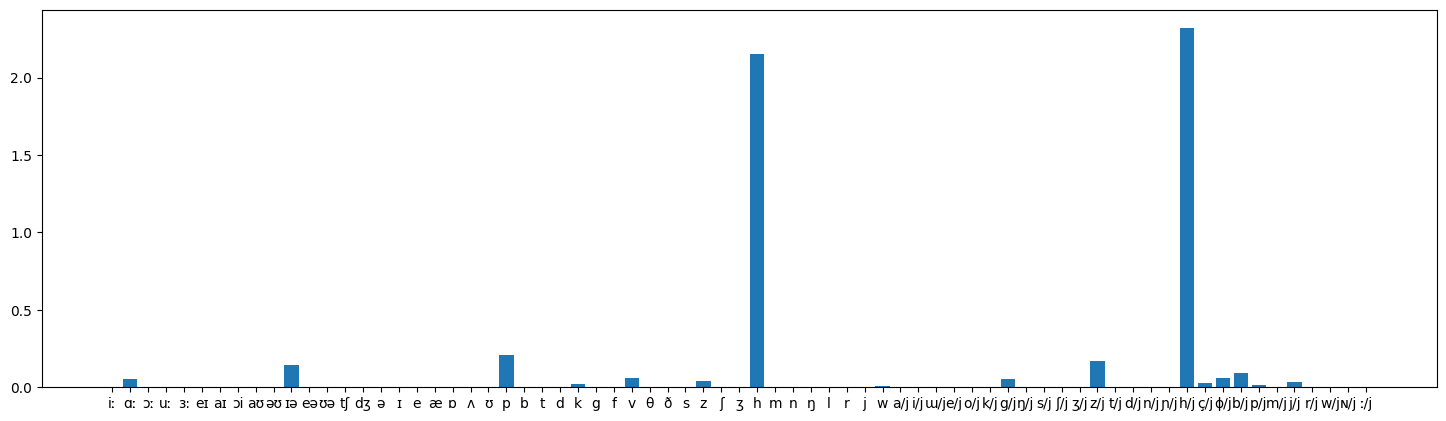

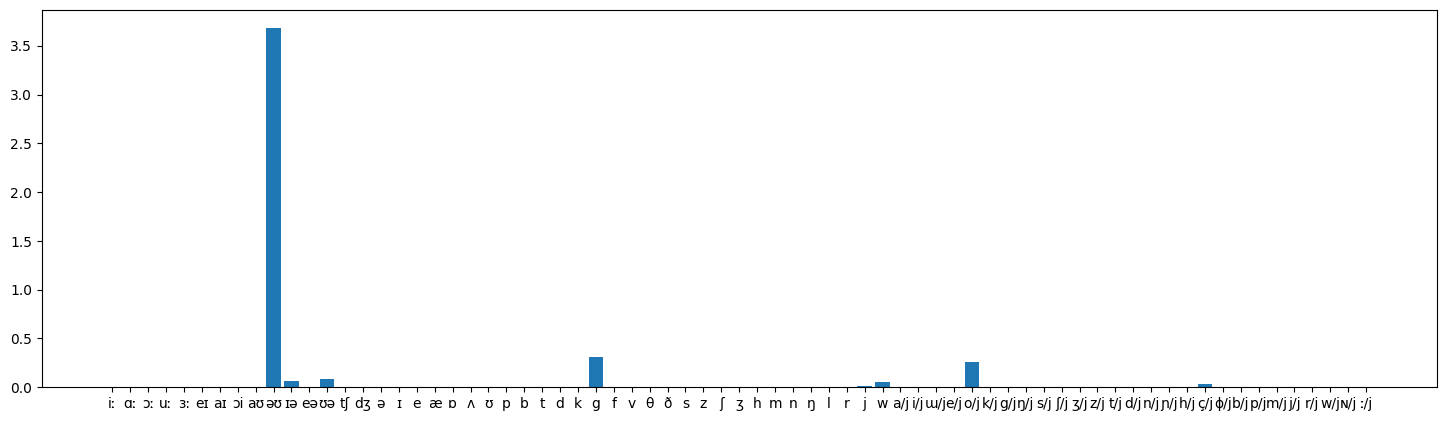

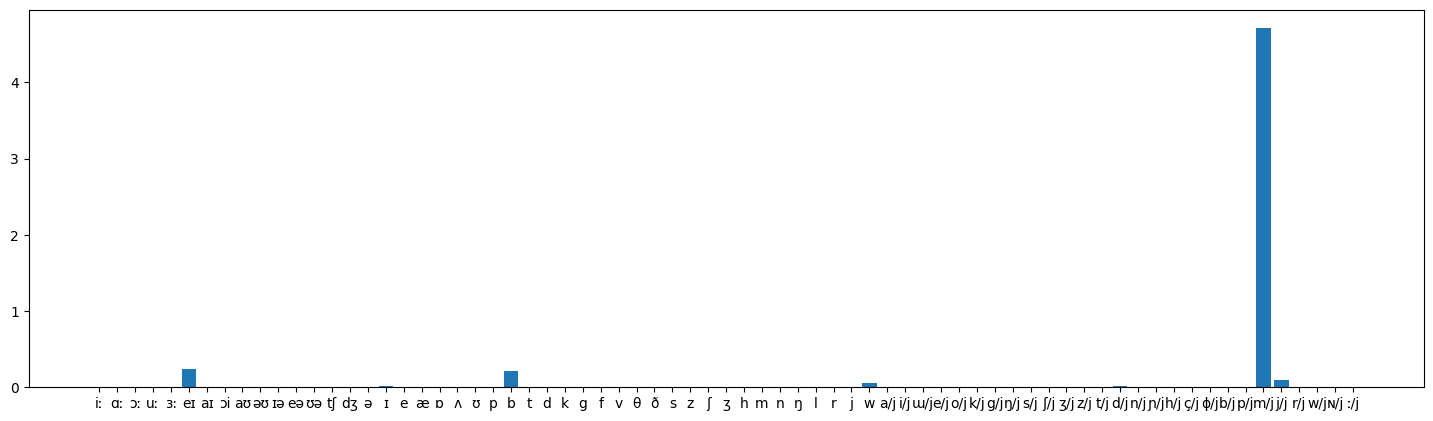

In [816]:
for i in range(P.shape[1]):
    plt.figure(figsize=(18,5),dpi=100)
    plt.bar(ipa,P[:,i])

## 基底が一番使われているデータを見る

In [711]:
atoms_used_in = []
for i in range(Q.shape[0]):
    atoms_used_in.append(Q[i,:].argmax())

In [822]:
Q[31,:].argsort()

array([  0, 427, 426, 424, 419, 418, 417, 416, 415, 414, 412, 410, 408,
       406, 405, 401, 397, 396, 391, 390, 388, 774, 385, 384, 383, 382,
       430, 378, 431, 433, 502, 498, 497, 494, 493, 488, 487, 482, 475,
       473, 471, 469, 467, 465, 464, 462, 461, 459, 455, 451, 448, 446,
       444, 443, 434, 432, 504, 376, 372, 299, 298, 297, 295, 288, 286,
       284, 282, 281, 274, 272, 271, 264, 263, 258, 256, 255, 254, 252,
       250, 248, 241, 240, 239, 235, 300, 373, 302, 307, 368, 363, 361,
       358, 356, 355, 354, 353, 349, 348, 347, 345, 343, 341, 340, 335,
       334, 330, 329, 323, 319, 318, 315, 314, 311, 305, 505, 507, 509,
       706, 705, 703, 702, 700, 699, 698, 697, 696, 694, 691, 689, 686,
       685, 684, 680, 679, 675, 673, 669, 667, 666, 665, 660, 656, 707,
       654, 708, 712, 767, 766, 764, 761, 760, 759, 758, 755, 749, 747,
       746, 745, 742, 740, 738, 737, 730, 729, 728, 726, 724, 722, 719,
       715, 714, 709, 653, 651, 648, 576, 575, 573, 569, 568, 56

In [833]:
data3[['japanese','english_ipa']].iloc[[5,236,601,371]]

,japanese,english_ipa
5,のものものものものものものも,nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔ...
236,よよよめほらほらよめふまきらーついてるよ,jəʊ jəʊ jəʊ mæn həʊld ɪt həʊld ɪt jəʊ mɛn huːm...
601,わらってごめんわらってごめんなぁごめんなもう,waɪ dəʊnt juː gəʊ əweɪ waɪ dəʊnt juː gəʊ əweɪ ...
371,おのがおのあひるのてんぷら,əʊ nəʊ gɒd əʊ nəʊ aɪ hɪə ðəʊz dæmd wɜːdz


In [820]:
data3[['japanese','english_ipa']].iloc[atoms_used_in]

,japanese,english_ipa
571,ばばあばばあばばあばばあどのこーすに,baɪ baɪ jʊə nəʊ gʊd fɔː miː
673,あまさんじゃんまたじゃんまたじゃん,ɑː maɪ sʌnʃaɪn maɪ sʌnʃaɪn maɪ sʌnʃaɪn
536,きゃべつはぜんぜんできてまへんきゃべつはぜんぜんできてまへんきゃべつはぜんぜんできてまへんで...,taɪm gɒt ðə taɪm tɪk tɪk tɪkɪn ɪn maɪ hɛd ×3tɪ...
76,あーべんとうほんとうなんですすこしののりのおおきさですほうれんそういかとなっとうそうめんやーべぇー,həʊld ðə pɪklz həʊld ðə lɛtɪs spɛʃəl ɔːdəz dəʊ...
738,ちちちちちちをゆらしてちちちちちちをゆらしてちちちちちちをゆらしてをゆらして,mɪs ʤæksən ɑː juː nɑːsti
5,のものものものものものものも,nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔ...
17,くせーくせーくせーくせーくせーくせーくせーくせーくせーどあのまえやっぱくせーよべんじょ,"sæd sæd sæd,sæd sæd sæd,sæd sæd sæd,bʌt jʊə gə..."
173,おっさんおっさんおっさんかおっさんえーじぶんだとおもう,wɒts ʌp wɒts ʌp wɒts ʌp gɜːl wɒts ʌp kreɪzi fɔ...
80,ここよけっきょくここよ,kuː kuː juː aɪ θɪŋk jʊə kuː kuː juː
477,とつにゅうとつにゅうとつにゅうかぎがかかってる,tʌʧɪŋ juː tʌʧɪŋ miː tʌʧɪŋ juː gɒd jʊə tʌʧɪŋ miː
